In [73]:
import pandas as pd
import os 
import matplotlib.pyplot as plt # We'll use os for reliable file path handling

# Path to the data directory (relative to the repository root)
data_path = 'Term-paper/data'  # Since we're already in the Term-paper folder

# Get list of CSV files using os.listdir (more reliable across systems)
try:
    # Get all files in the data directory
    all_files = os.listdir(data_path)
    # Filter for CSV files
    csv_files = [f for f in all_files if f.lower().endswith('.csv')]
    
    if not csv_files:
        print('No CSV files found in', data_path)
        merged_df = pd.DataFrame()
    else:
        dfs = []  # list to store (filename, dataframe) pairs
        for fname in csv_files:
            full_path = os.path.join(data_path, fname)  # Use os.path.join for reliable path construction
            try:
                df = pd.read_csv(full_path, sep=';')
                dfs.append((fname, df))
                print('Loaded', fname, '->', df.shape)
            except Exception as e:
                print('Failed to read', full_path, ':', e)

        # If files were successfully read, merge them
        if dfs:
            # Start with first DataFrame
            merged_df = dfs[0][1]
            for name, df in dfs[1:]:
                # find common columns to merge on
                common = [c for c in merged_df.columns if c in df.columns]
                if common:
                    # merge on all common columns (outer join to keep data)
                    merged_df = pd.merge(merged_df, df, how='outer', on=common)
                else:
                    # no common columns: concatenate side-by-side
                    merged_df = pd.concat([merged_df, df], axis=1)
            
            print('Final merged shape:', merged_df.shape)
        else:
            merged_df = pd.DataFrame()
            print('No files were successfully read')

except Exception as e:
    print('Error accessing data directory:', e)
    merged_df = pd.DataFrame()

Loaded CPI.csv -> (944, 1)
Loaded SCE-Apr-2014.csv -> (1311, 29)
Loaded SCE-Apr-2015.csv -> (1283, 29)
Loaded SCE-Apr-2016.csv -> (1214, 29)
Loaded SCE-Apr-2017.csv -> (1276, 29)
Loaded SCE-Apr-2018.csv -> (1300, 29)
Loaded SCE-Apr-2019.csv -> (1336, 29)
Loaded SCE-Apr-2020.csv -> (1300, 29)
Loaded SCE-Apr-2021.csv -> (1243, 29)
Loaded SCE-Apr-2022.csv -> (1269, 29)
Loaded SCE-Apr-2023.csv -> (1255, 29)
Loaded SCE-Apr-2024.csv -> (1082, 29)
Loaded SCE-Aug-2013.csv -> (1769, 29)
Loaded SCE-Aug-2014.csv -> (1352, 29)
Loaded SCE-Aug-2015.csv -> (1226, 29)
Loaded SCE-Aug-2016.csv -> (1271, 29)
Loaded SCE-Aug-2017.csv -> (1344, 29)
Loaded SCE-Aug-2018.csv -> (1331, 29)
Loaded SCE-Aug-2019.csv -> (1290, 29)
Loaded SCE-Aug-2020.csv -> (1193, 29)
Loaded SCE-Aug-2021.csv -> (1265, 29)
Loaded SCE-Aug-2022.csv -> (1300, 29)
Loaded SCE-Aug-2023.csv -> (1130, 29)
Loaded SCE-Aug-2024.csv -> (1108, 29)
Loaded SCE-Dec-2013.csv -> (1350, 29)
Loaded SCE-Dec-2014.csv -> (1302, 29)
Loaded SCE-Dec-2015.csv

In [74]:
merged_df

,"DATE,CPI",userid,wid,date,weight,female,educ,age,hispanic,black,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,NaN,70000220,201306,2013-06-04,16.3,1.0,3.0,28.0,0.0,1.0,...,100.0,0.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
1,NaN,70000224,201306,2013-06-03,0.2,0.0,4.0,65.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
2,NaN,70000234,201306,2013-06-17,4.1,1.0,3.0,41.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
3,NaN,70000238,201306,2013-06-13,3.0,0.0,3.0,74.0,0.0,0.0,...,10.0,1.0,1.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN
4,NaN,70000238,201307,2013-07-10,1.9,0.0,3.0,74.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,NaN,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0
176097,NaN,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176098,NaN,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,NaN,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,...,10.0,1.0,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0


In [75]:
merged_df = merged_df.drop('DATE,CPI', axis=1)

In [76]:
num_nunique_id = merged_df['userid'].nunique()
print('Number of unique user IDs:', num_nunique_id)

Number of unique user IDs: 23369


In [77]:
merged_df.head()

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70000220,201306,2013-06-04,16.3,1.0,3.0,28.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
1,70000224,201306,2013-06-03,0.2,0.0,4.0,65.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
2,70000234,201306,2013-06-17,4.1,1.0,3.0,41.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
3,70000238,201306,2013-06-13,3.0,0.0,3.0,74.0,0.0,0.0,1.0,...,10.0,1.0,1.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN
4,70000238,201307,2013-07-10,1.9,0.0,3.0,74.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
print(f'{len(merged_df['wid'].unique())} is the number of survey waves')

139 is the number of survey waves


In [79]:
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d')

In [80]:
merged_df['date'].dtype

dtype('<M8[ns]')

In [81]:
first_date = merged_df['date'].min()
last_date = merged_df['date'].max()

print("First date in dataset:", first_date)
print("Last date in dataset:", last_date)

First date in dataset: 2013-06-01 00:00:00
Last date in dataset: 2024-12-31 00:00:00


# Part 2

In [82]:


# Identify all numeracy-related columns automatically
num_cols = [col for col in merged_df.columns if col.startswith('num_lit_')]

# Fill missing numeracy values per individual
merged_df[num_cols] = merged_df.groupby('userid')[num_cols].transform(lambda x: x.ffill().bfill())


In [83]:
merged_df[num_cols].isna().sum()


num_lit_q1              217
num_lit_q1_correct      217
num_lit_q2              438
num_lit_q2_correct      438
num_lit_q3              643
num_lit_q3_correct      643
num_lit_q5              434
num_lit_q5_correct      434
num_lit_q6             1053
num_lit_q6_correct     1053
num_lit_q8            36396
num_lit_q8_correct    36396
num_lit_q9            36718
num_lit_q9_correct    36718
dtype: int64

In [84]:
merged_df.groupby('userid')[num_cols].first().isna().sum()


num_lit_q1              66
num_lit_q1_correct      66
num_lit_q2              97
num_lit_q2_correct      97
num_lit_q3             150
num_lit_q3_correct     150
num_lit_q5             126
num_lit_q5_correct     126
num_lit_q6             218
num_lit_q6_correct     218
num_lit_q8            5384
num_lit_q8_correct    5384
num_lit_q9            5435
num_lit_q9_correct    5435
dtype: int64

In [85]:
merged_df = merged_df.dropna(subset=['female','age','educ'])

In [86]:
merged_df[['female', 'age', 'educ']].isna().sum()

female    0
age       0
educ      0
dtype: int64

In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175233 entries, 0 to 176100
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   userid              175233 non-null  int64         
 1   wid                 175233 non-null  int64         
 2   date                175233 non-null  datetime64[ns]
 3   weight              175211 non-null  float64       
 4   female              175233 non-null  float64       
 5   educ                175233 non-null  float64       
 6   age                 175233 non-null  float64       
 7   hispanic            175146 non-null  float64       
 8   black               175233 non-null  float64       
 9   couple              162489 non-null  float64       
 10  num_kids            175205 non-null  float64       
 11  owner               23204 non-null   float64       
 12  inflation           174572 non-null  float64       
 13  house_price_change  174939 non-nul

In [88]:
before = len(merged_df)
print("Rows before drop:", before)

merged_df = merged_df.dropna(subset=['inflation','house_price_change','prob_stocks_up'])
after = len(merged_df)
print("Rows after drop:", after)
print("Rows dropped due to missing key variables:", before - after)

Rows before drop: 175233
Rows after drop: 173550
Rows dropped due to missing key variables: 1683


In [89]:
merged_df[num_cols]

,num_lit_q1,num_lit_q1_correct,num_lit_q2,num_lit_q2_correct,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,550.0,0.0,20.0,0.0,100.0,0.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
1,550.0,0.0,20.0,0.0,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
2,550.0,0.0,20.0,0.0,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
3,65.0,0.0,20.0,0.0,10.0,1.0,1.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN
4,65.0,0.0,20.0,0.0,10.0,1.0,1.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,550.0,0.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0
176097,150.0,1.0,40.0,0.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176098,150.0,1.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,150.0,1.0,224.0,0.0,10.0,1.0,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0


In [90]:
before = len(merged_df)
print("Rows before drop:", before)

merged_df = merged_df.dropna(subset=num_cols)

after = len(merged_df)
print("Rows after drop:", after)
print("Rows dropped due to missing numeracy data:", before - after)

Rows before drop: 173550
Rows after drop: 137576
Rows dropped due to missing numeracy data: 35974


In [91]:
threshhold_min = merged_df['inflation'].quantile(0.001)
threshhold_max = merged_df['inflation'].quantile(0.999)
print(threshhold_min)
print(threshhold_max)

-75.0
100.0


In [92]:
before = len(merged_df)
print("Rows before drop:", before)

merged_df = merged_df[merged_df['inflation'].between(threshhold_min, threshhold_max)]

after = len(merged_df)
print("Rows after drop:", after)
print("Rows dropped due to outliers in inflation:", before - after)

Rows before drop: 137576
Rows after drop: 137457
Rows dropped due to outliers in inflation: 119


In [93]:
merged_df['educ']

35333     4.0
35334     4.0
35335     4.0
35336     4.0
35337     4.0
         ... 
176096    3.0
176097    4.0
176098    3.0
176099    2.0
176100    4.0
Name: educ, Length: 137457, dtype: float64

In [94]:
iscollege = (merged_df['educ']>= 3)
merged_df.loc[:, 'college'] = (merged_df['educ'] >= 3).astype(int)

In [95]:
merged_df[['educ','college']]

,educ,college
35333,4.0,1
35334,4.0,1
35335,4.0,1
35336,4.0,1
35337,4.0,1
...,...,...
176096,3.0,1
176097,4.0,1
176098,3.0,1
176099,2.0,0


In [96]:
merged_df[num_cols]

,num_lit_q1,num_lit_q1_correct,num_lit_q2,num_lit_q2_correct,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
35333,150.0,1.0,242.0,1.0,10.0,1.0,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0
35334,150.0,1.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
35335,150.0,1.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
35336,150.0,1.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
35337,150.0,1.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,550.0,0.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0
176097,150.0,1.0,40.0,0.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176098,150.0,1.0,242.0,1.0,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,150.0,1.0,224.0,0.0,10.0,1.0,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0


In [97]:
# Columns ending with _correct
corrects = [col for col in num_cols if col.endswith('_correct')]

# Group by user and sum the correct answers
merged_df['total_correct'] = merged_df.groupby('userid')[corrects].transform('sum').sum(axis=1)



In [98]:
merged_df = merged_df.drop(columns=['total_correct'])

In [99]:
merged_df

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct,college
35333,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,1.0,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0,1
35334,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1
35335,70057321,201505,2015-05-11,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1
35336,70057321,201506,2015-06-20,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1
35337,70057321,201507,2015-07-22,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,1.0,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0,1
176097,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1
176098,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1
176099,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,1.0,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0,0


In [100]:
merged_df.loc[:,'total_correct'] = merged_df['userid'].map(
    merged_df.groupby('userid')[corrects].sum().sum(axis=1)
)

In [101]:
merged_df['num_lit_q1_correct'].min()

0.0

In [102]:
corrects = [col for col in merged_df.columns if col.endswith('_correct')]

# Ensure values are 0 or 1
merged_df[corrects] = merged_df[corrects].clip(upper=1)


In [103]:
merged_df['total_correct'] = merged_df[corrects].sum(axis=1)


In [104]:
merged_df

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct,college,total_correct
35333,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0,1,7.0
35334,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0
35335,70057321,201505,2015-05-11,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0
35336,70057321,201506,2015-06-20,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0
35337,70057321,201507,2015-07-22,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0,1,6.0
176097,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,7.0
176098,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0
176099,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0,0,6.0


In [105]:
# Group by user and pick the first total_correct per user (if multiple rows per user)
user_totals = merged_df.groupby('userid')['total_correct'].first()
print(user_totals.head())


userid
70057317    7.0
70057321    8.0
70057352    8.0
70057367    8.0
70057373    8.0
Name: total_correct, dtype: float64


In [106]:
counts = user_totals.value_counts().sort_index()

In [107]:
percentiles = counts / counts.sum() * 100
print(percentiles)

total_correct
0.0     0.141163
2.0     0.728402
3.0     2.405421
4.0     5.714286
5.0    10.519481
6.0    16.933936
7.0    27.402597
8.0    36.154715
Name: count, dtype: float64


In [108]:
mean = merged_df['total_correct'].mean()

In [109]:
merged_df['num_lit_high'] = (merged_df['total_correct'] >= mean).astype(int)

In [110]:
merged_df

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct,college,total_correct,num_lit_high
35333,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,0.0,5.0,1.0,3.0,1.0,2.0,1.0,1,7.0,1
35334,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
35335,70057321,201505,2015-05-11,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
35336,70057321,201506,2015-06-20,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
35337,70057321,201507,2015-07-22,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,1.0,5.0,1.0,2.0,0.0,2.0,1.0,1,6.0,0
176097,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,7.0,1
176098,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
176099,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,1.0,2.0,1.0,0,6.0,0


In [111]:
num_nunique_id = merged_df['userid'].nunique()
print('Number of unique user IDs:', num_nunique_id)

print(f'{len(merged_df)} is the total number of observations')

print(f'{len(merged_df['wid'].unique())} is the number of survey waves')

first_date = merged_df['date'].min()
last_date = merged_df['date'].max()

print("First date in dataset:", first_date)
print("Last date in dataset:", last_date)


Number of unique user IDs: 17710
137457 is the total number of observations
117 is the number of survey waves
First date in dataset: 2015-04-02 00:00:00
Last date in dataset: 2024-12-31 00:00:00


# Part 3

Average expectations by gender in percentage:


,inflation,house_price_change,prob_stocks_up
Gender,,,
Male,4.65,4.29,45.83
Female,7.44,6.38,38.12


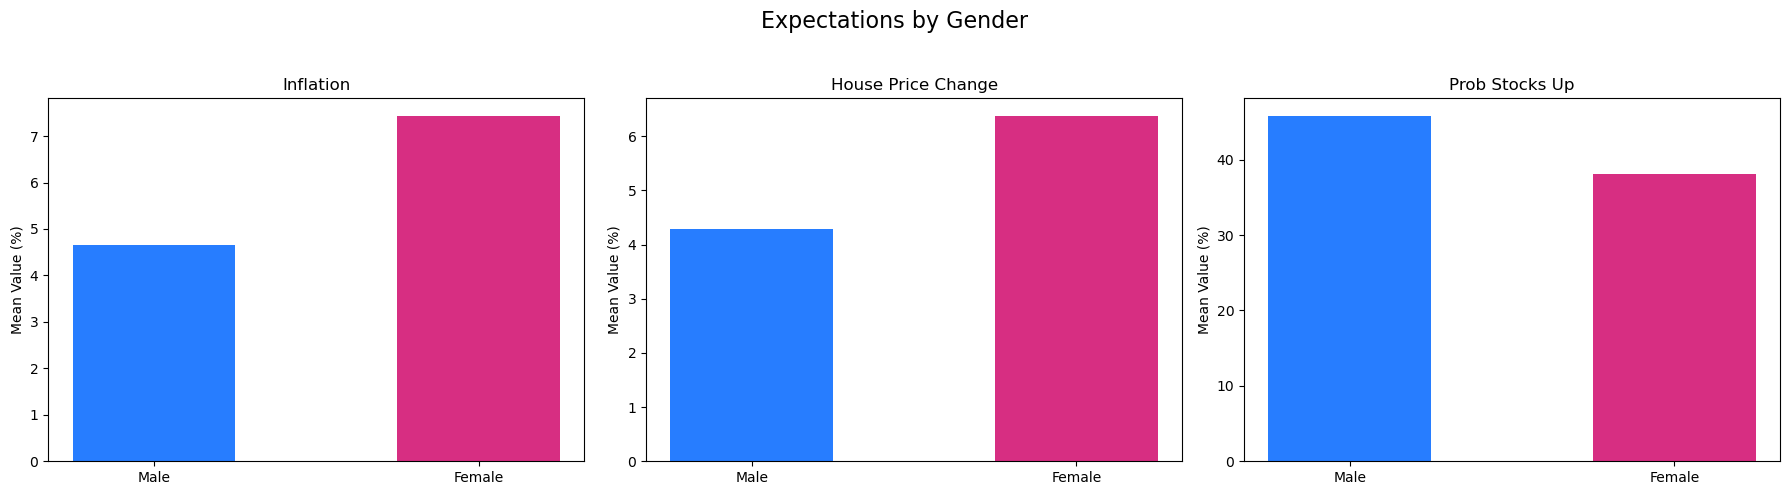

In [152]:
#3.1.1

expectation_vars = ['inflation', 'house_price_change', 'prob_stocks_up']

# Group by gender
gender_means = merged_df.groupby('female')[expectation_vars].mean().round(2)
gender_means.index.name = 'Gender'
gender_means.index = gender_means.index.map({0: 'Male', 1: 'Female'})

print("Average expectations by gender in percentage:")
display(gender_means)

#3.1.2
# Setup for 3 separate charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

colors = {'Male': '#277DFF', 'Female': '#D72E82'}

for i, var in enumerate(expectation_vars):
    axes[i].bar('Male', gender_means.loc['Male', var], color=colors['Male'], width=0.5)
    axes[i].bar('Female', gender_means.loc['Female', var], color=colors['Female'], width=0.5)
    axes[i].set_title(var.replace('_', ' ').title())
    axes[i].set_ylabel('Mean Value (%)')

plt.suptitle('Expectations by Gender', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Average expectations by education level in percentage:


,inflation,house_price_change,prob_stocks_up
Education,,,
Non-College,9.46,8.53,35.53
College,5.57,4.90,42.89


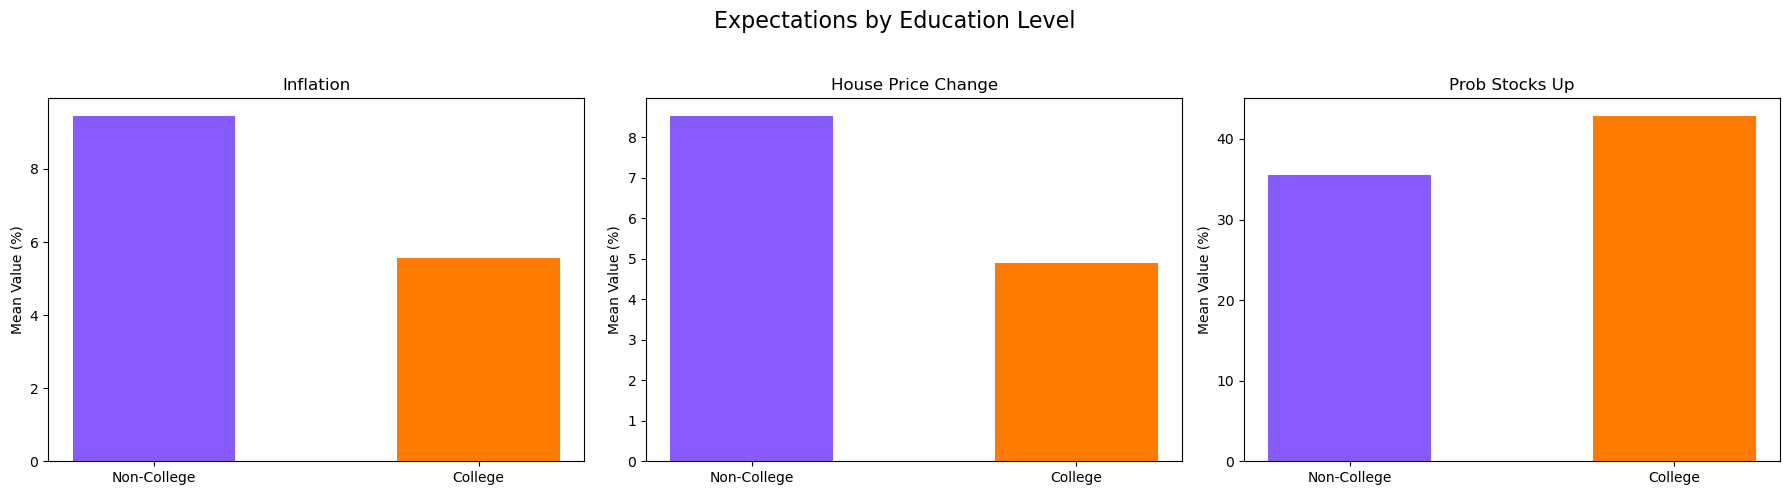

In [ ]:
#3.2.1
# Group by college education
education_means = merged_df.groupby('college')[expectation_vars].mean().round(2)
education_means.index.name = 'Education'
education_means.index = education_means.index.map({0: 'Non-College', 1: 'College'})

print("Average expectations by education level in percentage:")
display(education_means)

#3.2.2
# Setup for 3 separate charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

colors = {'Non-College': '#875AFB', 'College': '#FF7A00'}

for i, var in enumerate(expectation_vars):
    axes[i].bar('Non-College', education_means.loc['Non-College', var], color=colors['Non-College'], width=0.5)
    axes[i].bar('College', education_means.loc['College', var], color=colors['College'], width=0.5)
    axes[i].set_title(var.replace('_', ' ').title())
    axes[i].set_ylabel('Mean Value (%)')

plt.suptitle('Expectations by Education Level', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Average expectations by numeracy level in percentage:


,inflation,house_price_change,prob_stocks_up
Numeracy,,,
Low,8.92,7.78,36.27
High,4.51,4.04,45.06


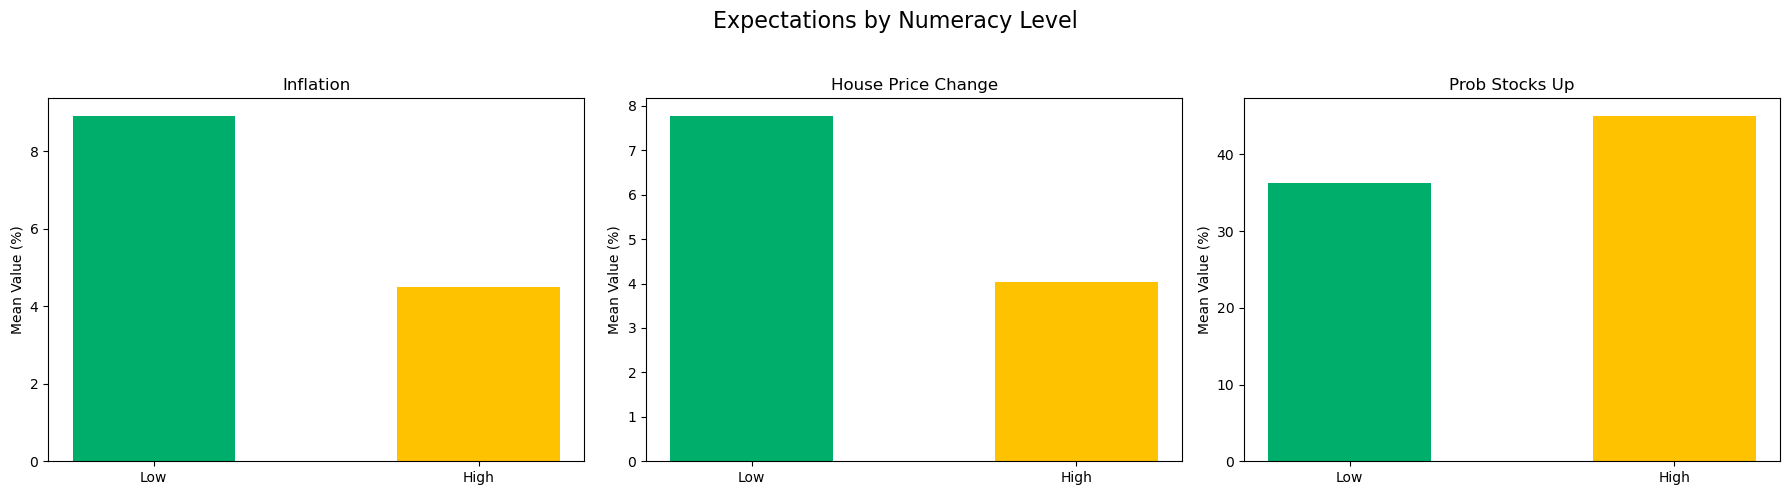

In [ ]:
#3.3.1
# Group by numeracy level
numeracy_means = merged_df.groupby('num_lit_high')[expectation_vars].mean().round(2)
numeracy_means.index.name = 'Numeracy'
numeracy_means.index = numeracy_means.index.map({0: 'Low', 1: 'High'})

print("Average expectations by numeracy level in percentage:")
display(numeracy_means)

#3.3.2
# Setup for 3 separate charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

colors = {'Low': '#00AE6b', 'High': '#FFC200'}

for i, var in enumerate(expectation_vars):
    axes[i].bar('Low', numeracy_means.loc['Low', var], color=colors['Low'], width=0.5)
    axes[i].bar('High', numeracy_means.loc['High', var], color=colors['High'], width=0.5)
    axes[i].set_title(var.replace('_', ' ').title())
    axes[i].set_ylabel('Mean Value (%)')

plt.suptitle('Expectations by Numeracy Level', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct,college,total_correct,num_lit_high
35333,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,0.0,5.0,1.0,3.0,1.0,2.0,1.0,1,7.0,1
35334,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
35335,70057321,201505,2015-05-11,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
35336,70057321,201506,2015-06-20,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
35337,70057321,201507,2015-07-22,0.4,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,1.0,5.0,1.0,2.0,0.0,2.0,1.0,1,6.0,0
176097,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,7.0,1
176098,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,8.0,1
176099,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,1.0,2.0,1.0,0,6.0,0


In [169]:

# Read the monthly CPI data
cpi = pd.read_csv("Term-paper/data/CPI.csv")

# Make sure the DATE column is in datetime format and ordered correctly
cpi["DATE"] = pd.to_datetime(cpi["DATE"])
cpi = cpi.sort_values("DATE").reset_index(drop=True)

# Compute realized forward-looking (next-12-month) inflation
cpi["inflation_forward"] = (cpi["CPI"].shift(-12) - cpi["CPI"]) / cpi["CPI"] * 100

# Optional: preview a few results
print(cpi[["DATE", "CPI", "inflation_forward"]].head(12))



         DATE   CPI  inflation_forward
0  1947-01-01  21.5          10.232558
1  1947-02-01  21.6           9.722222
2  1947-03-01  22.0           6.818182
3  1947-04-01  22.0           8.181818
4  1947-05-01  22.0           9.090909
5  1947-06-01  22.1           9.502262
6  1947-07-01  22.2           9.909910
7  1947-08-01  22.4           8.928571
8  1947-09-01  22.8           7.017544
9  1947-10-01  22.9           6.113537
10 1947-11-01  23.1           4.761905
11 1947-12-01  23.4           2.564103
